In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
advertising=pd.read_csv("advertising.csv")

In [54]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [55]:
advertising.shape

(200, 4)

In [56]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [57]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


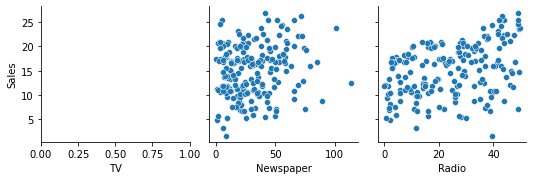

In [58]:
sns.pairplot(data=advertising,
            x_vars=[ "TV","Newspaper","Radio"], 
            y_vars="Sales")
plt.show()

In [59]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


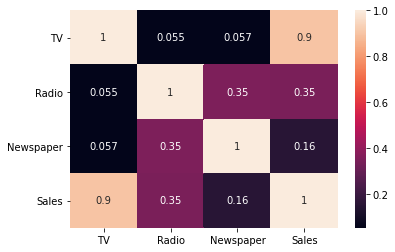

In [60]:
sns.heatmap(advertising.corr(), annot=True)
plt.show()

In [62]:
import statsmodels
import statsmodels.api as sm
import sklearn

In [63]:
X=advertising["TV"]
y=advertising["Sales"]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)

In [66]:
X_train.shape

(140,)

In [67]:
X_test.shape

(60,)

In [72]:
y_test.shape

(60,)

In [73]:
y_train.shape

(140,)

In [74]:
X_train_sm=sm.add_constant(X_train)

In [75]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [76]:
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [77]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.52e-52
Time:                        11:30:49   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

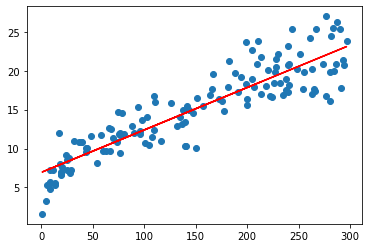

In [78]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 6.9487 + 0.0545*X_train, "r")
plt.show()

In [79]:
y_train_pred=lr_model.predict(X_train_sm)

In [80]:
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [81]:
res=y_train-y_train_pred

In [82]:
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

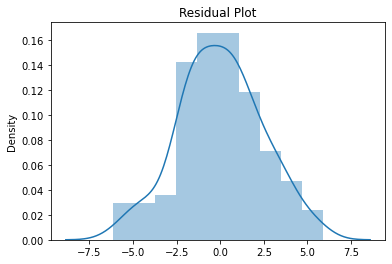

In [86]:
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

In [87]:
X_test_sm=sm.add_constant(X_test)

In [88]:
y_test_pred=lr_model.predict(X_test_sm)

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [91]:
r2=r2_score(y_true=y_test, y_pred=y_test_pred)

In [92]:
r2

0.7921031601245658

In [93]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8157933136480389

In [94]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826956

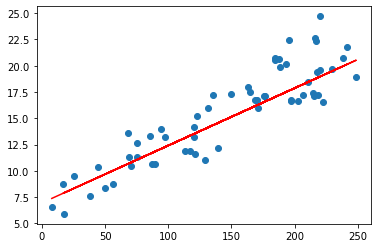

In [95]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_test_pred, "r")
plt.show()

In [100]:
from sklearn.linear_model import LinearRegression

In [97]:
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.70, random_state=100)

In [99]:
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)

In [101]:
lm = LinearRegression()

In [102]:
lm.fit(X_train_lm, y_train)

LinearRegression()

In [103]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [109]:
y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)

In [110]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
